## Introduction to Scikit Learn
The notebook demonstrate some of the most useful functions of the beautiful scikit learn library.

### What we're going to cover:
0. An end-to-end scikit-learn overflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Imporve a model
6. Save and load a trained model
7. Putting it all together!

## 0.An end-to-end Scikit-Learn overflow

In [2]:
import numpy as np

In [3]:
#1. Get the data ready
import pandas as pd
heart_disease=pd.read_csv('heart-disease.csv');
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Create X (features matrix)
X=heart_disease.drop('target',axis=1)

#Create Y (labels)
Y=heart_disease['target']

In [5]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
#2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
#3.Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [9]:
clf.fit(X_train,Y_train);

In [10]:
# Make a predicition
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3


In [11]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3


In [12]:
Y_preds=clf.predict(X_test)

In [13]:
Y_preds

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [14]:
Y_test

100    1
223    0
301    0
302    0
123    1
      ..
141    1
185    0
180    0
240    0
138    1
Name: target, Length: 61, dtype: int64

In [15]:
#4 Evaluate the model on training data and test data
clf.score(X_train,Y_train)

1.0

In [16]:
clf.score(X_test,Y_test)

0.8032786885245902

In [17]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [18]:
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.82      0.86      0.84        37

    accuracy                           0.80        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



In [19]:
confusion_matrix(Y_test,Y_preds)

array([[17,  7],
       [ 5, 32]])

In [20]:
accuracy_score(Y_test,Y_preds)

0.8032786885245902

In [21]:
#5. Improve the model
#Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accuracy on test set:{clf.score(X_test,Y_test)* 100 }% ")
    print("")

Trying model with 10 estimators...
Model accuracy on test set:75.40983606557377% 

Trying model with 20 estimators...
Model accuracy on test set:81.9672131147541% 

Trying model with 30 estimators...
Model accuracy on test set:80.32786885245902% 

Trying model with 40 estimators...
Model accuracy on test set:83.60655737704919% 

Trying model with 50 estimators...
Model accuracy on test set:80.32786885245902% 

Trying model with 60 estimators...
Model accuracy on test set:80.32786885245902% 

Trying model with 70 estimators...
Model accuracy on test set:81.9672131147541% 

Trying model with 80 estimators...
Model accuracy on test set:81.9672131147541% 

Trying model with 90 estimators...
Model accuracy on test set:80.32786885245902% 



In [22]:
#6. Save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [23]:
#load saved model
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,Y_test)

0.8032786885245902

In [24]:
import sklearn
sklearn.show_versions()


System:
    python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]
executable: /Users/mdaziz/Desktop/sample_project/env/bin/python
   machine: macOS-15.0.1-arm64-arm-64bit

Python dependencies:
      sklearn: 1.5.1
          pip: 24.2
   setuptools: 72.1.0
        numpy: 1.26.4
        scipy: 1.13.1
       Cython: None
       pandas: 2.2.2
   matplotlib: 3.8.4
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 10
         prefix: libopenblas
       filepath: /Users/mdaziz/Desktop/sample_project/env/lib/libopenblasp-r0.3.21.dylib
        version: 0.3.21
threading_layer: pthreads
   architecture: armv8

       user_api: openmp
   internal_api: openmp
    num_threads: 10
         prefix: libomp
       filepath: /Users/mdaziz/Desktop/sample_project/env/lib/libomp.dylib
        version: None


In [25]:
#Lets listify the contents
what_we_are_covering=[
    "0. An end to end scikit learn overflow",
    "1. Getting the data ready",
    "2. Choose the right estimatory/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predicition on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a model",
    "7. Putting it all together!"
]

In [26]:
what_we_are_covering

['0. An end to end scikit learn overflow',
 '1. Getting the data ready',
 '2. Choose the right estimatory/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predicition on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a model',
 '7. Putting it all together!']

## 1. Getting our data ready to be used with machine learning

### Three Main thing we have to do:
    1. Split the data into features and label (usually `X` & `Y`)
    2. Filling (also called imputing) or disregarding the missing values
    3. Coverting non-numerical value to numerical values (also called feature encoding) 

In [27]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
X=heart_disease.drop('target',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [29]:
y=heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [30]:
#Split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical 

In [32]:
car_sales=pd.read_csv('car-sales-extended.csv')

In [33]:
len(car_sales)

1000

In [34]:
car_sales['Doors'].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [35]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [36]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [37]:
# Split into X,y
X=car_sales.drop('Price',axis=1)
y=car_sales['Price']

In [38]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [39]:
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [40]:
# Split into training and test data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [41]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [42]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [43]:
# Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [44]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [45]:
# Other way to convert non-numeric coulmn to numeric
dummies=pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [46]:
# Lets refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

model.fit(X_train,y_train);


In [47]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [48]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some values (also known as imputation )
2. Remove the sample with missing data together

In [49]:
#import car sales missing data
car_sales_missing=pd.read_csv('car-sales-extended-missing-data.csv')

In [50]:
len(car_sales_missing)

1000

In [51]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [52]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
# Create X & y
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']


In [54]:
# Lets try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

transformed_X=transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1: Fill missing data with Pandas

In [55]:
car_sales_missing['Doors'].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [56]:
## Note we are mannually filling Na data with our custom data in updated version of ColumnTransformer it will handle Na value
#Fill the 'Make' column
car_sales_missing['Make'].fillna('missing',inplace=True)

# Fill the 'Colours' column
car_sales_missing['Colour'].fillna('missing',inplace=True)

# Fill the 'Odometer (KM) column'
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

# Fill the 'Doors' column
car_sales_missing['Doors'].fillna(4,inplace=True)

/var/folders/v9/9d0p17pn7432nmn0qr304svw0000gn/T/ipykernel_7464/4058411056.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing['Make'].fillna('missing',inplace=True)
/var/folders/v9/9d0p17pn7432nmn0qr304svw0000gn/T/ipykernel_7464/4058411056.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [57]:
#Fix the pandas future warning
#Fill the 'Make' column
car_sales_missing.fillna({'Make':'missing'},inplace=True)

# Fill the 'Colours' column
car_sales_missing.fillna({'Colour':'missing'},inplace=True)

# Fill the 'Odometer (KM) column'
car_sales_missing.fillna({'Odometer (KM)':car_sales_missing['Odometer (KM)'].mean()},inplace=True)

# Fill the 'Doors' column
car_sales_missing.fillna({'Doors':4},inplace=True)

In [58]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [59]:
# Remove rows with missing Price value 
car_sales_missing.dropna(inplace=True)

In [60]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [61]:
len(car_sales_missing)

950

In [62]:
# Re split the data as we drop na record
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']


In [63]:
#before converting non numeric column data numeric column seprate the training and test data
#this is the best approch for better model traning it's good you don't mix up training data set with test data

X_missing=car_sales_missing.drop('Price',axis=1)
y_missing=car_sales_missing['Price']

In [64]:
# Lets try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough',sparse_threshold=0)

transformed_X_missing=transformer.fit_transform(X_missing)


In [65]:
transformed_X_missing

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

### Option 2 . Fill missing value with Scikit Learn

In [66]:
car_sales_missing=pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [67]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [68]:
#Drop the row with no Label
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [69]:
#Split into X & y
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

In [70]:
#Fill missing value with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill Categorical value with 'missing' and numercal value with 'mean'
cat_imputer=SimpleImputer(strategy='constant',fill_value='missing')
door_imputer=SimpleImputer(strategy='constant',fill_value=4)
num_imputer=SimpleImputer(strategy='mean')

#Define Column
cat_features=['Make','Colour']
door_features=['Doors']
num_features=['Odometer (KM)']

#Create an imputer (Something that fills data)

imputer=ColumnTransformer([
    ('cat_imputer',cat_imputer,cat_features),
    ('door_imputer',door_imputer,door_features),
    ('num_imputer',num_imputer,num_features)
])

#Transform the data
filled_X=imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [71]:
car_sales_filled=pd.DataFrame(filled_X,columns=['Make','Colour','Doors','Ddometer (KM)'])


In [72]:
car_sales_filled.head()

,Make,Colour,Doors,Ddometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [73]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Ddometer (KM)    0
dtype: int64

In [74]:
# Lets try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [75]:
# Now we've got our data as numbers and filled (no missing values)
# Now let's fit a model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    transformed_X,
    y,
    test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

In [76]:
len(car_sales_filled), len(car_sales)

(950, 1000)

In [77]:
what_we_are_covering

['0. An end to end scikit learn overflow',
 '1. Getting the data ready',
 '2. Choose the right estimatory/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predicition on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a model',
 '7. Putting it all together!']

In [78]:
car_sales_filled

,Make,Colour,Doors,Ddometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


## 2 . Choosing the right estimator/algorithm for your problem
Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators.
* Classficiation problem - prediciting a category (heart disease or not)
    * Sometimes you'll see `clf` (short form of classifier) used as a classification estimator
* Regression problem - prediciting a number (selling price of a car)
if you're working on amaching learning problem and looking to use sklearn and not sure what model you should use refer to sklearn machine learning map : https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a machine learning model for a regression problem

Let's use the California  housing dataset

In [79]:
#Get California housing dataset
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [80]:
housing_df=pd.DataFrame(housing["data"],columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [81]:
housing_df['target']=housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [82]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [83]:
housing_df=housing_df.drop('MedHouseVal',axis=1)
housing_df.head()

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
# Import algorithm / estimator
from sklearn.linear_model import Ridge
#Setup random seed
np.random.seed(42)

#Create the data
X=housing_df.drop("target",axis=1)
y=housing_df['target'] # median house price in $100,000s

#split into train and test data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

#Instantiate and fit the model (on the training set)

model=Ridge()
model.fit(X_train,y_train)

#check the score of the model(on the test set)
model.score(X_test,y_test)

In [84]:
#try with different algo or estimator linear_model

from sklearn import linear_model
np.random.seed(42)

X=housing_df.drop('target',axis=1)
y=housing_df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=linear_model.LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5757877060324508

What if `Ridge` didn't work or the score didn't fit out needs?

Well , we could always try a different model 

how about we try an ensemble model (an enesembl is combination of smaller models to try and make better predicitions then just a single model)?

Sklearn ensemble model can be found here https://scikit-learn.org/stable/modules/ensemble.html


In [85]:
#try with another algo ensemble  randomforest Regressor
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X=housing_df.drop('target',axis=1)
y=housing_df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8059809073051385

## 2.2 Picking a machine learning model for a classification problem
map https://scikit-learn.org/stable/machine_learning_map.html

In [86]:
heart_disease=pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Cosutling the map and it says to try `LinearSVC`

In [87]:
#Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8688524590163934

In [88]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [89]:
#try another estimator randomForestClassifier

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8524590163934426

Tibdit:

    1. If you have structured data, used ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

In [90]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [91]:
what_we_are_covering

['0. An end to end scikit learn overflow',
 '1. Getting the data ready',
 '2. Choose the right estimatory/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predicition on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a model',
 '7. Putting it all together!']

## 3 Fit the model/algo on our data and use it to make predictions
### 3.1 Fitting the model to the data

Different names for:

    * X = features, features variables, data
    * y = labels, targets, targets variables

In [92]:
#import the randomForestClassifier estimator class
rom sklearn.ensemble import RandomForestClassifier

#Setup randkm seed
np.random.seed(42)

#Make the data
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instnatiatie Radom Forest Classifier
clf=RandomForestClassifier()

#Fit the model to the data ( training the machine learning model)
clf.fit(X_train,y_train)

#Evaluate the Random forest classifier (use the patterns the model has learn)
clf.score(X_test,y_test)

SyntaxError: invalid syntax (3472018890.py, line 2)

In [ ]:
X.head()

In [ ]:
y.head()

### 3.2 Make Predictions using a machine learning model
2 ways to make predections:

1.  `predict()`
2. `predict_probo()`

In [ ]:
clf

In [94]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [95]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [96]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [97]:
clf.score(X_test,y_test)

0.8524590163934426

In [99]:
#Comparing predictions to truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [100]:
clf.score(X_test,y_test)

0.8524590163934426

In [104]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [105]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predection with `predict_proba()`


In [109]:
#predict_proba() returrns probabilities of a classifications label 
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [110]:
#Let's predict on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [112]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [114]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


`predict()` can also be used for regression models

In [115]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [120]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create data
X=housing_df.drop('target',axis=1)
y=housing_df['target']

#split into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Create model instance
model=RandomForestRegressor();

#Fit the model to the data
model.fit(X_train,y_train)

# Make predictions
y_preds= model.predict(X_test)

In [121]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [123]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [125]:
#Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3270458119670544

In [126]:
housing_df['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three inbuilt ways to evaluate Scikit-learn model/estimators:

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

You can read more about these here : https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with a `score` method

In [135]:
from sklearn.ensemble import RandomForestClassifier
#Setup random seed
np.random.seed(42)

#Create X & y
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#Create train & test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Create a classifier model instance
clf=RandomForestClassifier(n_estimators=1000)

#Fit classifier to training data
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [136]:
#The highest value for the .score() method is 1.0 , the lowest is 0.0
clf.score(X_train,y_train)

1.0

In [137]:
clf.score(X_test,y_test)

0.8688524590163934

Let's use the `score()` on our regression problem...

In [138]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [145]:
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#Create X & y
X=housing_df.drop('target',axis=1)
y=housing_df['target']

#split data into train & test
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)

#create regression model instance
model=RandomForestRegressor(n_estimators=100)

#Train the model with training data
model.fit(X_train,y_train)

RandomForestRegressor()

In [147]:
#The default score() evaluation metric is r_squared for regression algorithms 
#Highest = 1.0 , lowest=0.0

In [141]:
#estimator count 2
model.score(X_test,y_test)

0.6979664249351754

In [144]:
#estimator count 10
model.score(X_test,y_test)

0.7851752292818259

In [146]:
#estimator count 100
model.score(X_test,y_test)

0.8059809073051385

In [149]:
y_test.mean()

2.0550030959302323

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

### 4.2 Evaluating a model using the `scoring` parameter

In [153]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
#Setup random seed
np.random.seed(42)

#Create X & y
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#Create train & test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Create a classifier model instance
clf=RandomForestClassifier(n_estimators=100)

#Fit classifier to training data
clf.fit(X_train,y_train);

In [154]:
clf.score(X_test,y_test)

0.8524590163934426

In [155]:
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [156]:
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [157]:
np.random.seed(42)

#single traning and test split score
clf_single_score=clf.score(X_test,y_test)

#take the mean of the 5-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y))

#compare the two
clf_single_score, clf_cross_val_score


(0.8524590163934426, 0.8248087431693989)

In [ ]:
#Default scoring parameters of classifier= mean accuracy
clf.score()

In [158]:
#scoring parameter set to none by default
cross_val_score(clf,X,y,cv=5,scoring=None)


array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

#### Accuracy

In [165]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [160]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

clf=RandomForestClassifier()

cross_val_score=cross_val_score(clf,X,y)

In [161]:
np.mean(cross_val_score)

0.8248087431693989

In [164]:
print(f"Heart Disease Classifier Cross-Validated Accuracy : {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy : 82.48%


**Area under the receiver operating characteristics curve (AUC/ROC)**

* Area under curve(AUC)
* Roc curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predict 1 when truth is 1
* False positive = model predict 1 when truth is 0
* True negative = model predict 0 when truth is 0
* False negative = model predict 0 when truth is 1

In [170]:
from sklearn.metrics import roc_curve

#Create training and test data
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.2)

#Fit the classifier
clf.fit(X_train,y_train)

#Make predections with probabilities
y_probs=clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.38, 0.62],
        [0.03, 0.97],
        [0.92, 0.08],
        [0.4 , 0.6 ],
        [0.09, 0.91],
        [0.02, 0.98],
        [0.11, 0.89],
        [0.76, 0.24],
        [0.59, 0.41],
        [0.5 , 0.5 ]]),
 61)

In [171]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.62, 0.97, 0.08, 0.6 , 0.91, 0.98, 0.89, 0.24, 0.41, 0.5 ])

In [172]:
#Calculate fpr, tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

#Check the false positive
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.06896552, 0.06896552, 0.13793103, 0.13793103, 0.20689655,
       0.20689655, 0.27586207, 0.27586207, 0.4137931 , 0.48275862,
       0.55172414, 0.55172414, 0.72413793, 0.79310345, 0.93103448,
       1.        ])

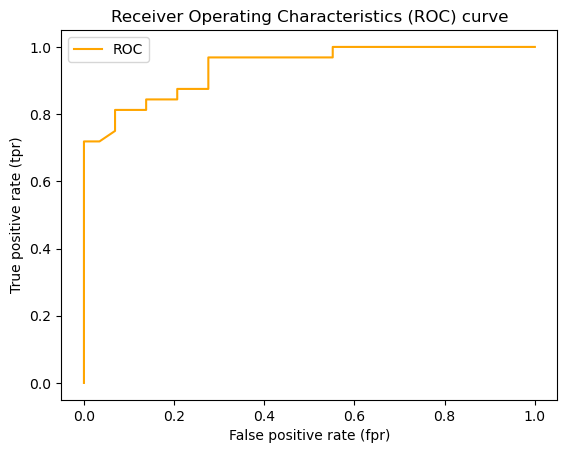

In [176]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr ) of a model.
    """

    #Plot roc curve
    plt.plot(fpr,tpr, color="orange",label="ROC")
    #Plot line with no predictive power (baseline)
    #plt.plot([0,1],[0,1], color="darkblue",linestyle="--",label="Guessing")

    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [175]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.9401939655172413

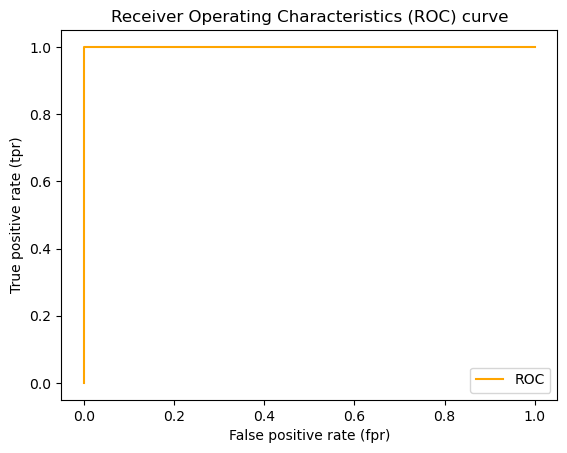

In [178]:
#Plot perfect ROC curve and AUC curve
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [179]:
#Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

The next way to evaluate a classification model is by using a confusion matrix.

A confusion metrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essesnce, giving you an idea of where the model is getting confused.
ref url - https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.confusion_matrix.html

In [181]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 5, 27]])

In [183]:
#Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,5,27


In [184]:
24 + 5 + 5 + 27

61

In [187]:
#How to install a conda package into the current environment from jupyter Notebook
import sys
!conda install --yes --prefix  {sys.prefix} seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/mdaziz/Desktop/sample_project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.9.24  |       hca03da5_0         131 KB
    certifi-2024.8.30          |  py312hca03da5_0         164 KB
    openssl-3.0.15             |       h80987f9_0         4.3 MB
    seaborn-0.13.2             |  py312hca03da5_0         714 KB
    ------------------------------------------------------------
                                           Total:         5.3 MB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/osx-arm64::seaborn-0.13.2-py312hca03da5_0 

The following packages will be UPDATED:

  ca-certificates                       2024.7.2-hca03da5_0 --> 202

### Creating a confusion matrix using Scikit-Learn

To use the new methods of creating a cofusion matrix with scikit-learn you will need sklearn version 1.0 +

#### Old Method

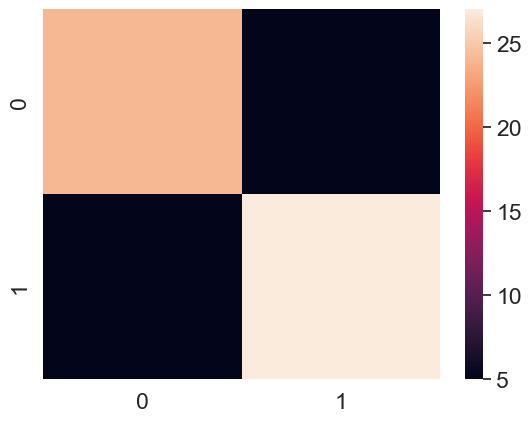

In [188]:
# Make our confusion matrix more visual with seaborn's heatmap()

import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);

In [189]:
#check sklearn version
import sklearn
sklearn.__version__

'1.5.1'

#### New Way

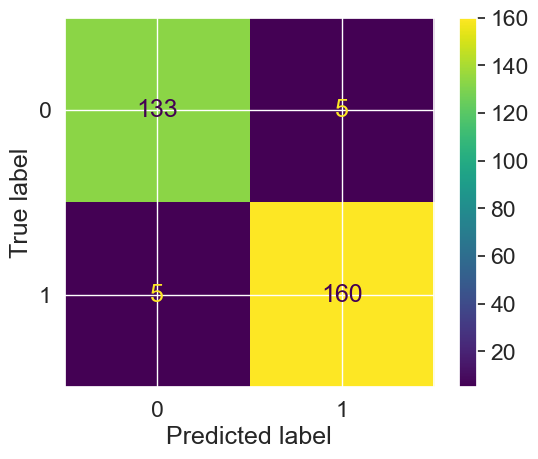

In [197]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X, y=y)

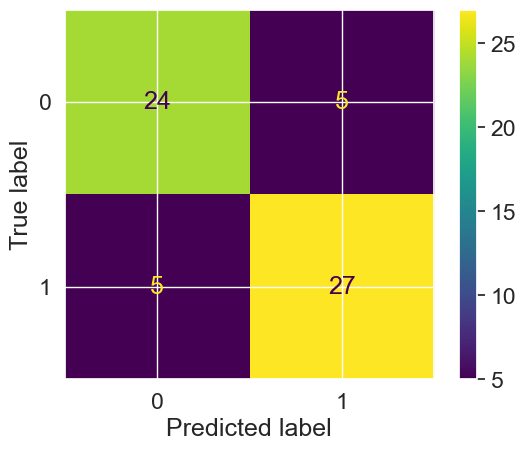

In [199]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds
                                       )

**Classification Report**

In [202]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [206]:
# Where precision and recall become valuable

disease_true=np.zeros(10000)
disease_true[0]=1  #Only one positive case
disease_preds=np.zeros(10000)  #Model predicts every case as 0

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True,zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To Summarize classification metrics:

* **Accuracy** is a good measure to start with if all classes are balance (e.g same amount of samples which are labelled with o or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* if false positive predictions are worse than dlase negatives, aim for higher precision.
* if false negative predictions are worse than false positive, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/1.5/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are :

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)


**R^2**

What a R-squared does : Compares your models predictions to the mean of the targets. Values can range from negative infinity( a very poor model) to 1. For example if all your model does is predict the mean of the targets. It's R^2 value would be 0. And if your model prefectly predicts a range of numbers it's R^2 value would be 1.

In [207]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop('target',axis=1)
y=housing_df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()

model.fit(X_train,y_train)

model.score(X_test,y_test)

0.8059809073051385

In [208]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [209]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [210]:
y_test.mean()

2.0550030959302323

In [211]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())

In [212]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [214]:
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

In [220]:
r2_score(y_true=y_test,y_pred=y_test)

1.0

In [215]:
y_preds=model.predict(X_test)

In [216]:
y_preds

array([0.49058  , 0.75989  , 4.9350165, ..., 4.8539888, 0.71491  ,
       1.66568  ])

In [217]:
r2_score(y_true=y_test,y_pred=y_preds)

0.8059809073051385

#### Mean Absolute Error (MAE)

MAE is the average of the absolute differences between predictions and actual values.
It gives you an idea of how wrong your models predictions are.


In [221]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [219]:
#MAE
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

0.3270458119670544

In [222]:
df=pd.DataFrame(data={"actual values":y_test,"predicted values":y_preds})
df["differences"]=df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390
13311,1.58700,1.658080,0.071080
7113,1.98200,2.342370,0.360370
7668,1.57500,1.667080,0.092080
18246,3.40000,2.560960,-0.839040
5723,4.46600,4.851978,0.385978


In [223]:
df["differences"].mean()

0.011913192441860052

In [224]:
#MAE using formulas and differences
np.abs(df['differences']).mean()

0.3270458119670544

#### Mean Squared Error (MSE)

MSE is the marn of the square of the errors between actual and predicted values.

In [229]:
#MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_preds)

0.2542443610174998

In [231]:
df["squared_difference"]=np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_difference
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [233]:
#Calculate MSE by hand
squared= np.square(df["differences"])
squared.mean()

0.2542443610174998

In [238]:
df_large_error=df.copy()
df_large_error.iloc[0]["squared_difference"]=16

/var/folders/v9/9d0p17pn7432nmn0qr304svw0000gn/T/ipykernel_7464/3316960908.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_difference"]=16


In [240]:
df_large_error.head()

,actual values,predicted values,differences,squared_difference
20046,0.47700,0.490580,0.013580,16.000000
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [241]:
#Calcualte MSE with large error
df_large_error["squared_difference"].mean()

0.25812028533523235

In [242]:
df_large_error.iloc[1:100]=20
df_large_error

,actual values,predicted values,differences,squared_difference
20046,0.47700,0.490580,0.013580,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.225000,-0.408000,0.166464
16623,2.66800,1.972540,-0.695460,0.483665
18086,5.00001,4.853989,-0.146021,0.021322
2144,0.72300,0.714910,-0.008090,0.000065


In [243]:
#Calcualte MSE with large error
df_large_error["squared_difference"].mean()

0.7342642968470183

### 4.2.3 Finally using `scoring` parameter

In [245]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

clf=RandomForestClassifier()

In [246]:
np.random.seed(42)

#cross-validation accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring=None)  # If scoring= None estimator's default scoring evaluation metrci is used (accuracy for classification model)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [255]:
#Cross validation accuracy
print(f"The cross-validation accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross-validation accuracy is : 82.48%


In [248]:
np.random.seed(42)

cv_acc=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [256]:
#Cross validation accuracy
print(f"The cross-validation accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross-validation accuracy is : 82.48%


In [251]:
#Precision
np.random.seed(42)
cv_precision=cross_val_score(clf,X,y,cv=5, scoring='precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [257]:
#Cross validation precision
print(f"The cross-validation precision is : {np.mean(cv_precision)}")

The cross-validation precision is : 0.8329547346025924


In [260]:
#Recall
np.random.seed(42)
cv_recall=cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [261]:
#Cross validation recall
print(f"The cross-validation recall is : {np.mean(cv_recall)}")

The cross-validation recall is : 0.8545454545454545


Let's see the `scoring` parameters used for regression problem

In [262]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X=housing_df.drop('target',axis=1)
y=housing_df['target']

model=RandomForestRegressor()

In [263]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=3,scoring=None)
np.mean(cv_r2)

0.6538469004539024

In [264]:
cv_r2

array([0.61899722, 0.72073286, 0.62181062])

In [274]:
#Mean absolute error
cv_mae=cross_val_score(model,X,y,cv=5,scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.4674531616666668

In [275]:
cv_mae

array([-0.5507566 , -0.40913707, -0.43998726, -0.4639702 , -0.47341468])

In [276]:
#Mean squared error
cv_mse=cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.42634828422054616

In [277]:
cv_mse

array([-0.50647112, -0.34850459, -0.37378634, -0.44159149, -0.46138788])

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators  is to using `skearn.metrics` modules

In [279]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

#Create X & y
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Create a model
clf=RandomForestClassifier()

#Fit model
clf.fit(X_train,y_train)

#Make prediction
y_preds=clf.predict(X_test)

#Evaluate model using evaluation functions
print("Classification metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")


Classification metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [285]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

#Create X & y
X=housing_df.drop('target',axis=1)
y=housing_df['target']

#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Create a model
model=RandomForestRegressor()

#Fit model
model.fit(X_train,y_train)

#Make a prediction
y_preds=model.predict(X_test)

#Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test,y_preds)}")
print(f"MAE score: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE score: {mean_squared_error(y_test,y_preds)}")

Regression metrics on the test set
R2 score: 0.8059809073051385
MAE score: 0.3270458119670544
MSE score: 0.2542443610174998


In [286]:
what_we_are_covering

['0. An end to end scikit learn overflow',
 '1. Getting the data ready',
 '2. Choose the right estimatory/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predicition on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a model',
 '7. Putting it all together!']

## 5. Improving a model

First predictions= baseline predictions.
First model= baseline model.

**From a data perspective:**
* Could we collect more data? (generally, the more data, the better)
* Could we improve the data?

**From a model perspective:**
* Is there a better model we could use?
* Could we improve the current model?

**Hyperparameters vs. Parameters**
1. Parameters = model find these patterns in data
2. Hyperparameters = settings on a model that you can adjust to (potentially) improve its ability to find patterns

**Three ways to adjust hyperparameters:**
1. By Hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV 


In [289]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

### 5.1 Tunning hyperparameters by hand

Let's make 3 set training, validation and test

In [290]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**We're going to try and adjust:**
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [311]:
def evaluate_preds(y_true,y_preds):
    """
    Perfoms evaluation comparision on y_truee labesl vs. y_preds labels 
    on a classification model
    """

    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                  "precision" :round(precision,2),
                  "recall": round(recall,2),
                  "f1":round(f1,2)
                }
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision : {precision:.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"F1 : {f1:.2f}")

    return metric_dict

In [294]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [319]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffle the data 
heart_disease_shuffled=heart_disease.sample(frac=1)

#Split into X & y
X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']

#Split the data into train, validation & test sets
train_split=round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split=round(train_split+ 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

#Make model
clf=RandomForestClassifier(n_estimators=10)

#Fit the model
clf.fit(X_train,y_train)

#Predict on validation set
#Make baseline predictions
y_preds=clf.predict(X_valid)

#Evaluate the classification on validation set
baseline_metrics= evaluate_preds(y_valid,y_preds)
baseline_metrics

Accuracy: 80.00%
Precision : 0.77
Recall : 0.92
F1 : 0.84


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [321]:
#create a second classifier with different hyperparameters
clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

#Make predictions with different hyperparameters
y_preds_2=clf_2.predict(X_valid)

#Evaluate the 2nd classification on validation set
clf_2_metrics= evaluate_preds(y_valid,y_preds_2)
clf_2_metrics

Accuracy: 82.22%
Precision : 0.81
Recall : 0.88
F1 : 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [323]:
clf_3=RandomForestClassifier(n_estimators=100,
                            max_depth=10
                            )
clf_3.fit(X_train,y_train)

#Make predictions with different hyperparameters
y_preds_3=clf_3.predict(X_valid)

#Evaluate the 3rd classification on validation set
clf_3_metrics= evaluate_preds(y_valid,y_preds_3)
clf_3_metrics

Accuracy: 82.22%
Precision : 0.79
Recall : 0.92
F1 : 0.85


{'accuracy': 0.82, 'precision': 0.79, 'recall': 0.92, 'f1': 0.85}

In [324]:
clf_4=RandomForestClassifier(n_estimators=100,
                            max_depth=10,
                             min_samples_split=5
                            )
clf_4.fit(X_train,y_train)

#Make predictions with different hyperparameters
y_preds_4=clf_4.predict(X_valid)

#Evaluate the 4th classification on validation set
clf_4_metrics= evaluate_preds(y_valid,y_preds_4)
clf_4_metrics

Accuracy: 84.44%
Precision : 0.82
Recall : 0.92
F1 : 0.87


{'accuracy': 0.84, 'precision': 0.82, 'recall': 0.92, 'f1': 0.87}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [336]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators": [10,100,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],
      "max_features":["auto","sqrt"],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]}

np.random.seed(42)

#Split into X & y
X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']

#Split into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

#Setup randomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                        param_distributions=grid,
                         n_iter=10, #number of models to try
                         cv=5,
                         verbose=2)

#Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/Users/mdaziz/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mdaziz/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mdaziz/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/mdaziz/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/base.py", line 666,

In [333]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [335]:
#Let's make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Accuracy: 83.61%
Precision : 0.78
Recall : 0.89
F1 : 0.83


## 5.3 Hyperparameter tuning with GridSearchCV

In [337]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [343]:
grid_2={'n_estimators': [100,200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [344]:
grid_2

{'n_estimators': [100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]}

In [346]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#Split into X & y
X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']

#Split into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

#Setup GridSearchCV
gs_clf=GridSearchCV(estimator=clf,
                          param_grid=grid_2,
                          cv=5,
                          verbose=2)

#Fit the GridSearchCV version of clf
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

/Users/mdaziz/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mdaziz/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mdaziz/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/mdaziz/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/base.py", line 666,

In [347]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [348]:
gs_y_preds=gs_clf.predict(X_test)

#evaluate the predcitions
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Accuracy: 81.97%
Precision : 0.77
Recall : 0.86
F1 : 0.81


Let's compare our different model metrics

<Axes: >

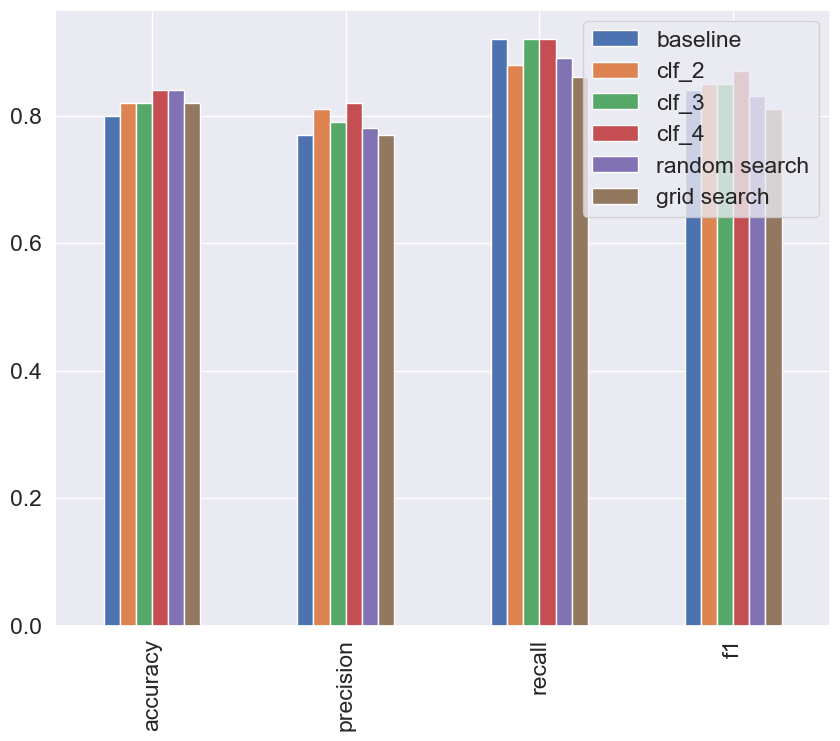

In [353]:
conpare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                              "clf_2":clf_2_metrics,
                              "clf_3":clf_3_metrics,
                              "clf_4":clf_4_metrics,
                              "random search":rs_metrics,
                              "grid search":gs_metrics})

conpare_metrics.plot.bar(figsize=(10,8))